Скачайте двнные классификации листьев растений по ссылке.
https://archive.ics.uci.edu/ml/machine-learning-databases/00241/

Загрузим файл `data_Mar_64.txt`.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploder = files.upload()

Saving data_Mar_64.txt to data_Mar_64.txt


In [ ]:
data = pd.read_csv('data_Mar_64.txt', header=None)


Первый столбец - ответ, положим его в отдельную переменную.

In [ ]:
X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

Целевая переменная принимает текстовое значение. С помощью `LabelEncoder` из `sklearn` закодируй тектовую переменную `y_name` и сохраните полученные значения в переменную `y`.

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_name)
y = le.transform(y_name)

2

С помощью метода главных компонент снизьте размерность признакового пространства до двух. Зафиксируйте `random_state=0`

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
data_2d = pca.fit_transform(X)

Выберите объекты, которые соответствуют значениям от 0 до 14 целевой переменной `y`. Изобразите выбранные объекты в двумерном пространстве признаков с помощью метода `scatter` из `matplotlib.pyplot`. Чтобы разным цветом отобразить объекты разных классов, в метод `scatter` передайте `c = y[y<15]`.

In [ ]:
print(data_2d)

[[-0.03307489  0.02892331]
 [-0.02422727  0.01839179]
 [-0.02629431  0.03441262]
 ...
 [-0.06300588 -0.05859334]
 [-0.03770296 -0.05299064]
 [-0.03348526 -0.03997298]]


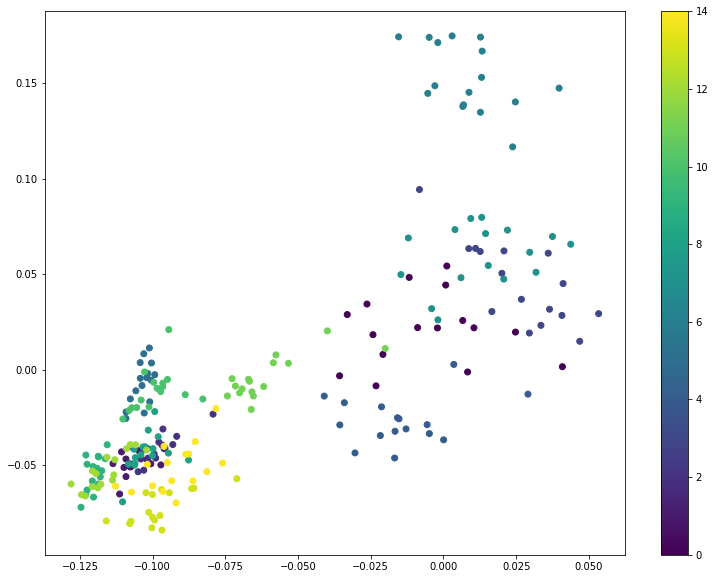

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 10))
plt.scatter(data_2d[:, 0][y<15], data_2d[:, 1][y<15], c=y[y<15])
plt.colorbar()
plt.show()

Проделайте тоже самое для метода TSNE.

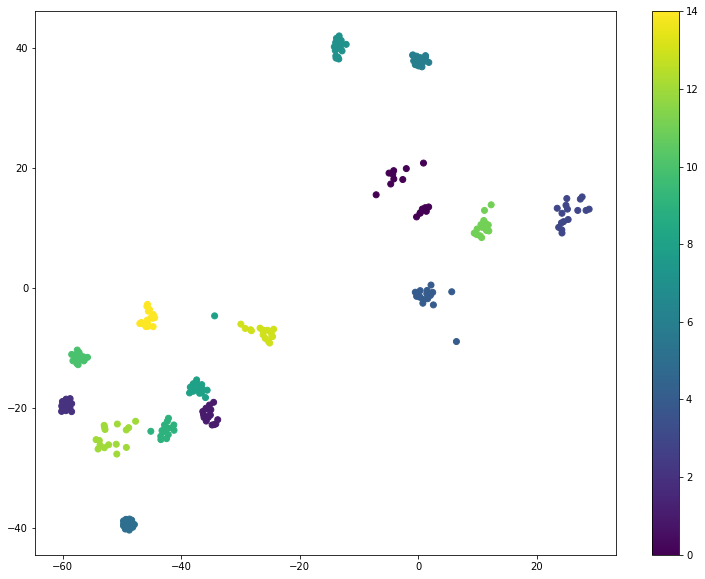

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
data_2d = tsne.fit_transform(X)

plt.figure(figsize=(13, 10))
plt.scatter(data_2d[:, 0][y<15], data_2d[:, 1][y<15], c=y[y<15])
plt.colorbar()
plt.show()

1. Укажите координаты объекта с индексом 0 (`X[0]`) после применения метода TSNE. Округлите числа до сотых.

In [ ]:
data_2d[0]

array([-7.1163464, 15.603844 ], dtype=float32)

2. Укажите координаты объекта с индексом 0 (X[0]) после применения метода PCA. Округлите числа до сотых.

In [ ]:
data_2d[0]

array([-0.03307489,  0.02892331])

3. Какие выводы можно сделать из полученных изображений?
- С мпомощью метода главных компонет удалось визуализировать объекты на плоскоти и объекты разных класов визуально разделимы 

- **С мпомощью метода TSNE удалось визуализировать объекты на плоскоти и объекты разных класов визуально разделимы**

- С мпомощью методов TSNE и PCA удалось визуализировать объекты на плоскоти и объекты разных класов визуально разделимы

- С мпомощью методов TSNE и PCA удалось визуализировать объекты на плоскоти и объекты разных класов визуально не разделимы


## K_means

Реализуйте класс MyKMeans.

Класс должен соответствовать шаблону, который приведен ниже

В конструктор класса передаются:
- n_clusters - число кластеров, на которое будут разбиты данные

- n_iters - максимальное число итераций, может быть сделано в данном алгоритме

В методе `fit`:

- self.centers - центры кластеров, которые пересчитываются на каждой итерации. Изначально выбираются случайным образом с фиксированным seed.

далее в цикле по числу итераций вам необходимо реализовать:
-  вычисление ближайшего центра кластера для каждого объекта
- пересчет центра каждого кластера( среднее каждой из координат всех объектов, отнесенных к этому кластеру)
посчитанные новые центры кластеров положите в переменную `new_centers`

В методе `predict`:

вычисляются ближайшие центры кластеров для объектов `X`




In [ ]:
from sklearn.metrics import pairwise_distances_argmin
np.random.seed(0)
n_clusters=3
centers = np.random.uniform(low=X.min(axis = 0),
                            high=X.max(axis = 0),
                            size=(n_clusters, X.shape[1]))

centers_objects = {k: [] for k in range(len(centers))}
for i in range(len(X)):
  closest_center = pairwise_distances_argmin(X[i].reshape(1, -1), centers)[0]
  centers_objects[closest_center].append(i)
print(X[centers_objects[0][0]][0])
print(X[262][0])
sum_values = [0.0] * 7

print(sum_values)
new_centers = []
coords_number = len(X[0])
for i in range(len(centers)):
  sum_values = [0.0] * 64
  for j in range(len(centers_objects[i])):
    for k in range(64):
      sum_values[k] += X[centers_objects[i][j]][k]
  mean_values = [m/len(centers_objects[i]) for m in sum_values]
  new_centers.append(mean_values)
print(new_centers)
print(len(new_centers))

In [ ]:
data = {k: [] for k in range(len(centers))}
data

{0: [], 1: []}

In [ ]:
from sklearn.metrics import pairwise_distances_argmin
class MyKMeans():
  def __init__(self, n_clusters=3, n_iters = 100):
    self.n_clusters = n_clusters
    self.n_iters = n_iters
    
  def fit(self, X):
    np.random.seed(0)
    self.centers = np.random.uniform(low=X.min(axis = 0),
                                high=X.max(axis = 0),
                                size=(self.n_clusters, X.shape[1]))

    for it in range(self.n_iters):
    
      ## your code here
      centers_objects = {k: [] for k in range(len(self.centers))}
      for i in range(len(X)):
        closest_center = pairwise_distances_argmin(X[i].reshape(1, -1), self.centers)[0]
        centers_objects[closest_center].append(i)
      new_centers = []
      coords_number = len(X[0])
      for i in range(len(self.centers)):
        sum_values = [0.0] * coords_number
        for j in range(len(centers_objects[i])):
          for k in range(coords_number):
            sum_values[k] += X[centers_objects[i][j]][k]
        mean_values = [m/len(centers_objects[i]) for m in sum_values]
        new_centers.append(mean_values)
        
      if np.all(self.centers == new_centers):
        break

      self.centers = new_centers


  def predict(self, X):
    labels = pairwise_distances_argmin(X, self.centers)
    return labels

Сгенерируем данные для кластеризации

In [ ]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 3.0, 0.5],
                             random_state=0)

In [ ]:
X, y = noisy_blobs

4. Кластеризуйте объекты noisy_blobs с помощью `MyKMeans`, используйте гиперпараметры `n_clusters=3`, `n_iters=100`. Укажите ответ для объекта с индексом 1.

In [ ]:
mymk = MyKMeans(n_clusters=3, n_iters=100)
mymk.fit(X)
hundred_iters = mymk.predict(X)
print(hundred_iters)
print(len(X))

[2 0 2 2 2 0 2 0 1 0 2 2 2 2 0 1 2 2 0 0 2 1 2 0 0 2 2 2 0 1 2 2 2 0 2 1 0
 2 2 1 2 1 2 2 0 1 0 2 0 1 0 0 1 0 0 0 1 2 2 1 2 2 2 2 2 0 1 1 2 2 0 0 0 2
 0 2 0 0 2 2 2 0 0 0 0 0 0 1 0 1 0 1 1 2 0 2 0 2 0 2 0 2 2 1 0 0 2 0 1 1 0
 0 0 2 2 2 0 2 0 1 0 1 2 2 0 0 2 2 2 0 0 2 0 0 2 0 2 2 2 2 0 2 0 2 2 2 0 0
 2 0 0 2 0 0 0 2 0 1 2 2 0 0 0 0 0 0 2 0 0 1 1 2 2 2 2 0 0 0 2 2 0 0 0 1 1
 0 2 0 2 0 2 2 1 2 2 0 2 2 2 1 0 2 2 0 0 2 2 2 1 0 2 0 0 0 0 2 0 2 2 0 2 0
 2 2 0 1 2 0 0 2 2 0 2 2 0 1 0 1 2 2 2 2 2 2 0 2 2 2 1 0 2 0 2 2 2 0 0 2 2
 1 0 1 1 1 0 1 2 2 2 0 2 2 2 2 2 2 0 1 2 2 0 0 1 0 2 0 2 2 1 2 0 2 0 1 1 0
 0 1 0 1 2 1 1 2 0 0 1 0 0 0 2 0 2 0 2 1 2 1 0 1 0 2 2 0 0 2 1 2 0 0 2 2 2
 2 0 2 0 2 2 1 0 2 0 2 1 1 0 0 0 1 0 0 2 2 0 2 0 0 0 0 1 2 0 1 2 2 2 2 0 1
 0 1 2 0 2 2 2 2 2 2 0 2 2 1 0 2 2 1 2 1 2 2 0 0 0 2 2 2 1 1 1 0 0 0 2 2 0
 1 1 2 0 0 2 0 2 0 0 2 1 2 2 2 1 0 0 2 2 0 1 2 2 2 2 2 2 2 2 2 0 1 0 2 0 0
 0 2 2 0 1 2 2 0 2 0 0 0 1 2 2 2 2 2 2 2 0 2 0 0 0 0 0 0 1 0 1 0 0 0 2 2 1
 2 2 2 2 0 1 1 2 2 1 0 2 

5. Кластеризуйте объекты noisy_blobs, используйте гиперпараметры n_clusters=3, n_iters = 5. Укажите ответ для объекта с индексом 1.

In [ ]:
mymk = MyKMeans(n_clusters=3, n_iters=5)
mymk.fit(X)
five_iters = mymk.predict(X)
print(five_iters)

[2 0 2 2 2 2 2 0 1 0 2 2 2 2 0 1 2 2 0 0 2 1 2 0 0 2 2 2 0 1 2 2 2 0 2 1 0
 2 2 1 2 1 2 2 0 1 0 2 0 1 0 0 1 0 0 0 1 2 2 1 2 2 2 2 2 0 1 1 2 2 0 0 0 2
 0 2 2 0 2 2 2 2 0 0 0 0 0 1 0 1 2 1 1 2 0 2 0 2 0 2 0 2 2 1 0 0 2 0 1 1 0
 0 0 2 2 2 0 2 0 1 0 1 2 2 0 0 2 2 2 0 0 2 0 0 2 0 2 2 2 2 0 2 0 2 2 2 0 0
 2 0 0 2 0 0 0 2 0 1 2 2 0 0 0 0 0 0 2 0 0 1 1 2 2 2 2 0 0 0 2 2 0 0 0 1 1
 0 2 0 2 0 2 2 1 2 2 0 2 2 2 1 0 2 2 0 0 2 2 2 1 0 2 0 0 0 0 2 0 2 2 0 2 0
 2 2 0 1 2 0 0 2 2 0 2 2 0 1 0 1 2 2 2 2 2 2 0 2 2 2 1 0 2 0 2 2 1 0 0 2 2
 1 0 1 1 1 0 1 2 2 2 2 2 2 2 2 2 2 0 1 2 2 0 0 1 0 2 0 2 2 1 2 0 2 0 1 1 0
 0 1 0 1 2 1 1 2 0 0 1 0 0 0 2 0 2 0 2 1 2 1 0 1 0 2 2 0 0 2 0 2 0 0 2 2 2
 2 0 2 0 2 2 1 0 2 0 2 1 1 0 0 0 1 0 0 2 2 0 2 0 0 0 1 1 2 0 1 2 2 2 2 0 1
 0 1 2 0 2 2 2 2 2 2 0 2 2 1 0 2 2 1 2 1 2 2 0 0 0 2 2 2 1 1 1 0 0 0 2 2 0
 1 1 2 0 0 2 0 2 0 0 2 1 2 2 2 1 0 0 2 2 0 1 2 2 2 2 2 2 2 2 2 0 1 0 2 0 2
 0 2 2 0 1 2 2 0 2 0 0 0 1 2 2 2 2 2 2 2 0 2 0 0 0 0 0 0 1 0 1 0 0 0 2 2 1
 2 2 2 2 0 1 1 2 2 1 0 2 

6. Вычислите у какого числа объектов изменилась метка предсказываемого кластера при изменении гиперпараметра n_iters с 5 до 100

In [ ]:
count = 0
for i in range(len(hundred_iters)):
  if hundred_iters[i] != five_iters[i]:
    count += 1
print(count)

17


7. Определите за сколько итераций сошелся алгоритм на объектах noisy_blobs?

In [ ]:
mymk = MyKMeans(n_clusters=3, n_iters=900)
mymk.fit(X)
some_iters = mymk.predict(X)

count = 0
for i in range(len(some_iters)):
  if some_iters[i] != hundred_iters[i]:
    count += 1
print(count)
np.random.seed(0)
centers = np.random.uniform(low=X.min(axis = 0),
                            high=X.max(axis = 0),
                            size=(n_clusters, X.shape[1]))
for it in range(100):
    
  ## your code here
  centers_objects = {k: [] for k in range(len(centers))}
  for i in range(len(X)):
    closest_center = pairwise_distances_argmin(X[i].reshape(1, -1), centers)[0]
    centers_objects[closest_center].append(i)
  new_centers = []
  coords_number = len(X[0])
  for i in range(len(centers)):
    sum_values = [0.0] * coords_number
    for j in range(len(centers_objects[i])):
      for k in range(coords_number):
        sum_values[k] += X[centers_objects[i][j]][k]
    mean_values = [m/len(centers_objects[i]) for m in sum_values]
    new_centers.append(mean_values)
        
  if np.all(centers == new_centers):
    print('it:', it)
    break

  centers = new_centers

0
it: 10


In [ ]:
## your code here

## DBSCAN

8. Кластеризуйте объекты noisy_blobs с помощью DBSCAN. Используйте реализацию DBSCAN из sklearn. Зафиксируйте гиперпараметр eps=0.5. Укажите ответ для объекта с индексом 1.

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5)
print(db.fit_predict(X))

[ 0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  6  0  0  0 -1  0  0
  0  0  0  0 -1  1  0  0  0  0  0 -1  0  0  2  0  0 -1  0 -1  0 -1  0  0
  0  0  0  0  3  0  0  0  4  0  0 -1  0  0  0  0  0  0  0  5  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0
  0 -1  0  0  0  0  0  8  0  0  0  0  1 -1  0  0  0  2  0  0  0  0  0 -1
  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  5  4  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0
 -1  0  0  0  0  0  6  7  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0 -1  0 -1  0  0
  0  0  0  0  0  0  0  0 -1 -1  0 -1  0  0 -1  0  0  0  0  7  0  4  9 -1
  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0 -1  3 -1  0  0  0
 -1  0  0  0  0 -1 -1  0  0 -1  0  5  0 -1  8  0  0  0  1  0  0  0  0  0
  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0 -1  0  0

1000

9. Укажите полученное число кластеров?

In [ ]:
set(db.fit_predict(X).tolist())

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

10. Сколько объектов было отнечено к выбросам (имеют метку -1)?

In [ ]:
db.fit_predict(X).tolist().count(-1)

152